Load Data from seaborn dataset

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
111,6.4,2.7,5.3,1.9,virginica
18,5.7,3.8,1.7,0.3,setosa
133,6.3,2.8,5.1,1.5,virginica
5,5.4,3.9,1.7,0.4,setosa
17,5.1,3.5,1.4,0.3,setosa
138,6.0,3.0,4.8,1.8,virginica
126,6.2,2.8,4.8,1.8,virginica
128,6.4,2.8,5.6,2.1,virginica
100,6.3,3.3,6.0,2.5,virginica
93,5.0,2.3,3.3,1.0,versicolor


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


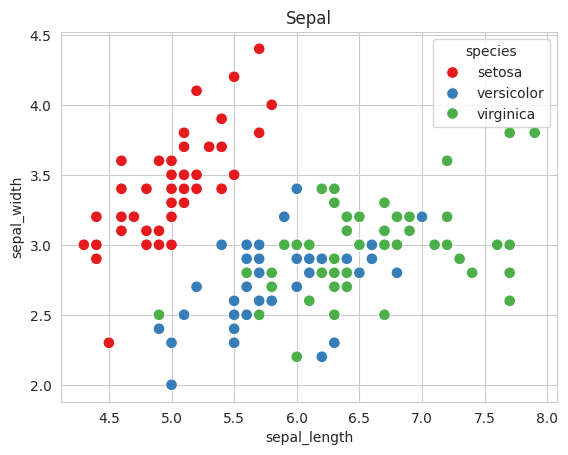

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(x='sepal_length',y='sepal_width', data=df, hue='species',palette='Set1', s=70)
plt.title('Sepal')
plt.show()

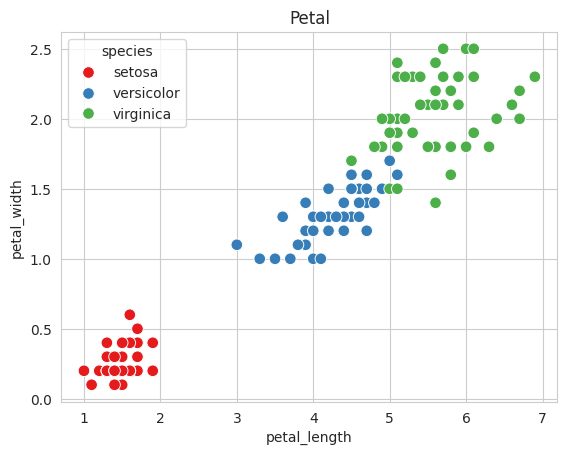

In [ ]:
sns.scatterplot(x='petal_length',y='petal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('Petal')
plt.show()

In [ ]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[feature_cols]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = df.species
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

# Naive Bayes - Cross Validation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

df = sns.load_dataset('iris')
X = df.drop('species', axis=1)
y = df.species

model = GaussianNB()
cvs = cross_val_score(model, X, y, cv=10)
print('cross val scores', cvs.round(3))
print('mean = ', cvs.mean().round(4) * 100)

cross val scores [0.933 0.933 1.    0.933 0.933 0.933 0.867 1.    1.    1.   ]
mean =  95.33


# Naive Bayes - Train/Test split

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

df = sns.load_dataset('iris')
X = df.drop('species', axis=1)
y = df.species

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy Score:  0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.80      1.00      0.89        12
   virginica       1.00      0.77      0.87        13

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.95      0.93      0.93        45

[[20  0  0]
 [ 0 12  0]
 [ 0  3 10]]


show the data that predict false

In [ ]:
import pandas as pd
dy = pd.DataFrame()
dy['y_test'] = y_test
dy['y_pred'] = y_pred
dy['result'] = y_test == y_pred

dy[dy.result == False]

,y_test,y_pred,result
134,virginica,versicolor,False
133,virginica,versicolor,False
119,virginica,versicolor,False


#SVM

In [ ]:
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

df = sns.load_dataset('iris')
X = df.drop('species', axis=1)
y = df.species

model = SVC(kernel='linear')

cvs = cross_val_score(model, X, y, cv=10)
print('cross val scores', cvs.round(3))
print('mean (%) = {:.4f}' .format(cvs.mean() * 100 ))

cross val scores [1.    0.933 1.    1.    0.867 1.    0.933 1.    1.    1.   ]
mean (%) = 97.3333


# Random Forest

Score -> 0.9111
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.81      0.93      0.87        14
   virginica       0.93      0.81      0.87        16

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

[[15  0  0]
 [ 0 13  1]
 [ 0  3 13]]


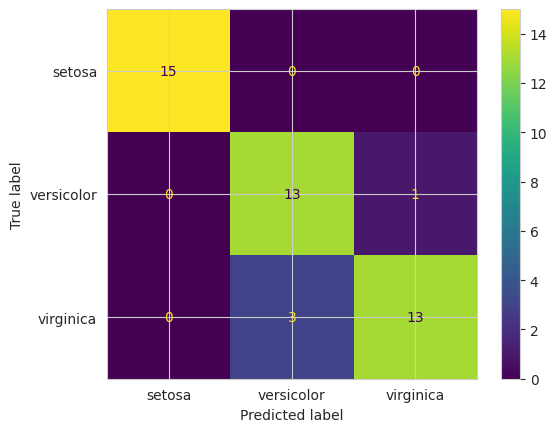

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report


df = sns.load_dataset('iris')
X = df.drop('species', axis=1)
y = df.species

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
model = RandomForestClassifier(n_estimators=80)
model.fit(X_train, y_train)

class_names = df.species.unique()
class_names

y_predict = model.predict(X_test)

print('Score -> {:.4f}' . format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict, target_names=class_names))
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = class_names)
cm_display.plot()
plt.show()

# Exercise: Classify dataset pima-indians-diabetes.data.csv

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qNpoW6TcRxbt7tSzwgoyLJoLwlUijaGH' -O pima-indians-diabetes.data.csv


--2024-12-10 15:38:46--  https://docs.google.com/uc?export=download&id=1qNpoW6TcRxbt7tSzwgoyLJoLwlUijaGH
Resolving docs.google.com (docs.google.com)... 74.125.202.139, 74.125.202.100, 74.125.202.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.202.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1qNpoW6TcRxbt7tSzwgoyLJoLwlUijaGH&export=download [following]
--2024-12-10 15:38:46--  https://drive.usercontent.google.com/download?id=1qNpoW6TcRxbt7tSzwgoyLJoLwlUijaGH&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.132.132, 2607:f8b0:4001:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.132.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26848 (26K) [application/octet-stream]
Saving to: ‘pima-indians-diabetes.data.csv’

pima-indians-diabet 100%[===================>]  26.22K  

In [ ]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pandas.read_csv("pima-indians-diabetes.data.csv")

df

,PatientID,NumberOfPregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,HasDiabetes
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,764,10,101,76,48,180,32.9,0.171,63,0
764,765,2,122,70,27,0,36.8,0.340,27,0
765,766,5,121,72,23,112,26.2,0.245,30,0
766,767,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.isnull().sum()

,0
PatientID,0
NumberOfPregnant,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigree,0
Age,0
HasDiabetes,0


In [ ]:
df.drop(df[(df["BloodPressure"]==0) | (df["SkinThickness"]==0) | (df["Insulin"]==0) | (df["Glucose"]== 0) | (df["BMI"] == 0)].index, inplace=True)
len(df)

392

In [ ]:
HasDiabetes_0 = df[df.HasDiabetes == 0]
HasDiabetes_1 = df[df.HasDiabetes == 1]

HasDiabetes_0_sampled = HasDiabetes_0.sample(n=130, random_state=42)

combined_data = pd.concat([HasDiabetes_0_sampled, HasDiabetes_1])
combined_data = combined_data.reset_index(drop=True)

df = combined_data

In [ ]:
df["HasDiabetes"].value_counts()

,count
HasDiabetes,
0,130
1,130


In [ ]:
X = df.drop(['PatientID','HasDiabetes'], axis=1)
X.sample(5)

,NumberOfPregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
99,1,100,66,29,196,32.0,0.444,42
92,0,117,66,31,188,30.8,0.493,22
95,3,88,58,11,54,24.8,0.267,22
98,3,116,74,15,105,26.3,0.107,24
234,1,181,78,42,293,40.0,1.258,22


In [ ]:
y = df.HasDiabetes
y.sample(5)

,HasDiabetes
201,1
7,0
76,0
258,1
28,0


In [ ]:
y.value_counts()

,count
HasDiabetes,
0,130
1,130


In [ ]:
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel='linear')

cvs = cross_val_score(model, X, y, cv=10)
print('cross val scores', cvs.round(3))
print('mean (%) = {:.4f}' .format(cvs.mean() * 100 ))

cross val scores [0.846 0.731 0.615 0.731 0.692 0.846 0.769 0.846 0.923 0.808]
mean (%) = 78.0769


Score -> 0.7692
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        39
           1       0.82      0.69      0.75        39

    accuracy                           0.77        78
   macro avg       0.78      0.77      0.77        78
weighted avg       0.78      0.77      0.77        78

[[33  6]
 [12 27]]


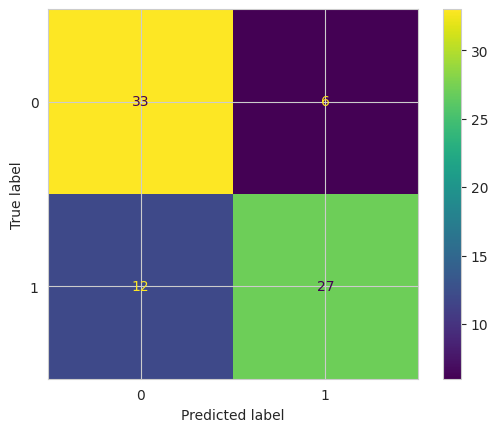

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

class_names = df.HasDiabetes.unique()
class_names

y_predict = model.predict(X_test)

print('Score -> {:.4f}' . format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict))
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = class_names)
cm_display.plot()
plt.show()

In [ ]:
# DT, NB, RF


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



### Decision tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)
y_train.value_counts()

,count
HasDiabetes,
1,100
0,100


In [ ]:
y_test.value_counts()

,count
HasDiabetes,
0,30
1,30


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

dtree = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features="sqrt",
    random_state=2,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight={0:0.15,1:0.175},
    ccp_alpha=0.0125,
    monotonic_cst=None
    )
dtree = dtree.fit(X_train, y_train)
y_predict = dtree.predict(X_test)

acc = accuracy_score(y_test, y_predict)
print("accuracy score: ", acc)
cm = confusion_matrix(y_test, y_predict)
print(cm)
print(classification_report(y_test, y_predict))

accuracy score:  0.8166666666666667
[[22  8]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        30
           1       0.77      0.90      0.83        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



### Naive bays

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

nb = GaussianNB(
    priors=None,
    var_smoothing=1e-09
)
nb = nb.fit(X_train, y_train)

y_predict = nb.predict(X_test)

acc = accuracy_score(y_test, y_predict)
print("accuracy score: ", acc)
cm = confusion_matrix(y_test, y_predict)
print(cm)
print(classification_report(y_test, y_predict))

accuracy score:  0.7
[[21  9]
 [ 9 21]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        30
           1       0.70      0.70      0.70        30

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



### Ramdomforest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

RF = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=5,
    verbose=0,
    warm_start=False,
    class_weight={0:0.15,1:0.175},
    ccp_alpha=0.0125,
    max_samples=None,
    monotonic_cst=None
)
RF = RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

acc = accuracy_score(y_test, y_predict)
print("accuracy score: ", acc)
cm = confusion_matrix(y_test, y_predict)
print(cm)
print(classification_report(y_test, y_predict))

accuracy score:  0.7833333333333333
[[23  7]
 [ 6 24]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.77      0.80      0.79        30

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

